In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import r2_score

## Loading The Dataset

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

## Data Cleaning and Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

We can see that the column Unnamed:32 is filled with all NaN values, which is of not much use to us. Hence we can drop this column as it serves no purpose in training our model

In [6]:
df.drop(columns=['Unnamed: 32'],inplace=True)
df.drop(columns=['id'],inplace=True)

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

We have 32 Columns of data now and our target is the diagnosis column

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

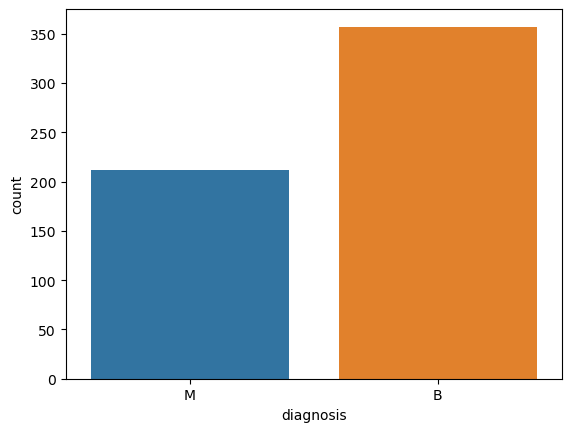

In [9]:
sns.countplot(x = 'diagnosis', data = df)

In [10]:
df['diagnosis'].replace(['B','M'],[0,1],inplace=True)

Since we are trying to perform Regression, Categorical data is not desired, hence we are converting it to Numerical Data

In [11]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

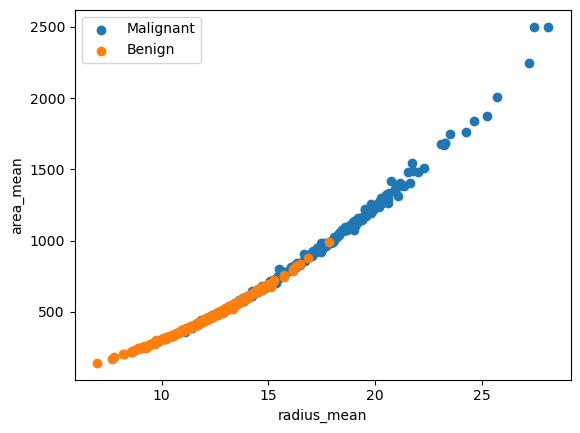

In [12]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]
plt.scatter(M.radius_mean,M.area_mean, label = "Malignant")
plt.scatter(B.radius_mean,B.area_mean, label = "Benign")
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.legend()
plt.show()

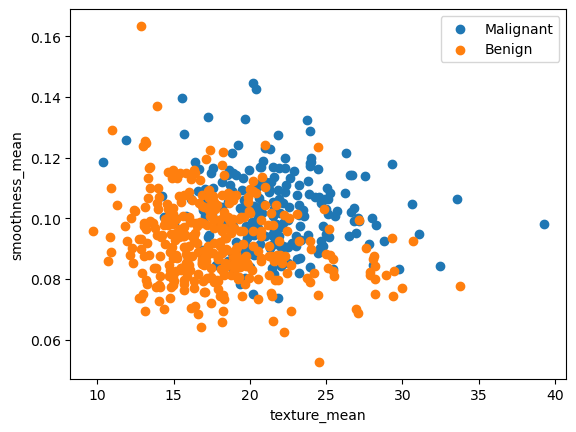

In [13]:
M = df[df.diagnosis == 1]
B = df[df.diagnosis == 0]
plt.scatter(M.texture_mean,M.smoothness_mean, label = "Malignant")
plt.scatter(B.texture_mean,B.smoothness_mean, label = "Benign")
plt.xlabel("texture_mean")
plt.ylabel("smoothness_mean")
plt.legend()
plt.show()

<Axes: >

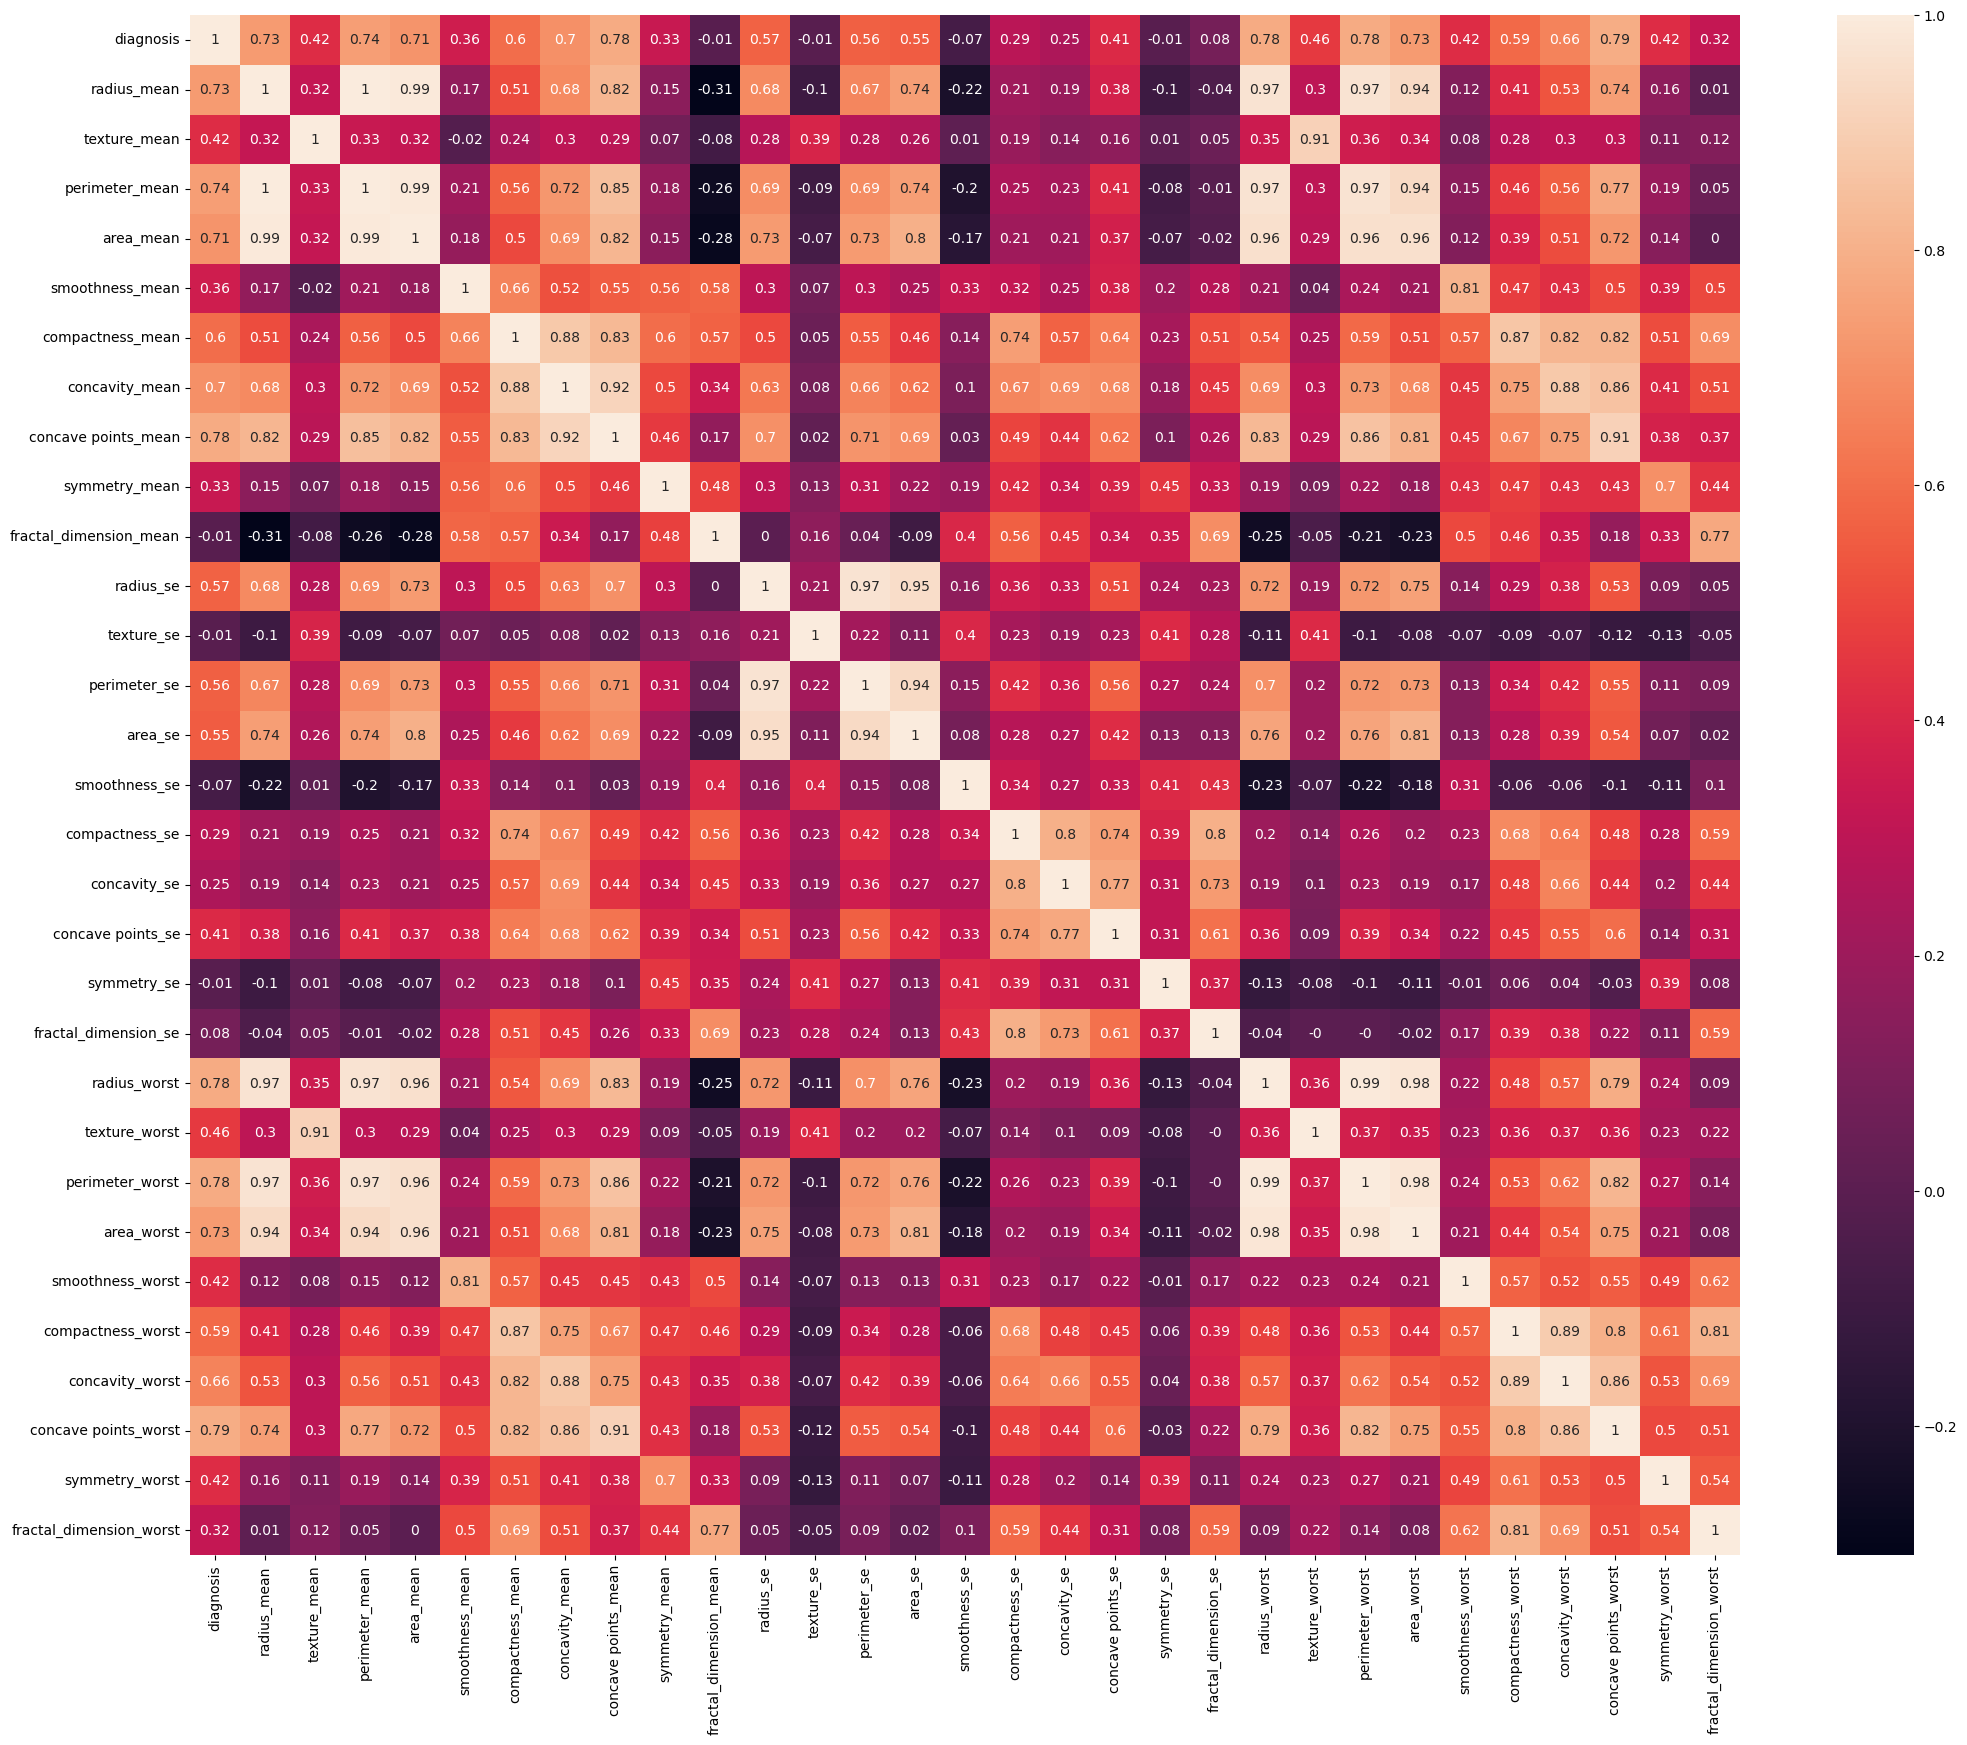

In [14]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True)

In [15]:
correlation_matrix = df.corr()

correlation_cancer_target = correlation_matrix['diagnosis']

# Filtering correlations greater than 0.5
corr_target_best = correlation_cancer_target[correlation_cancer_target > 0.5]


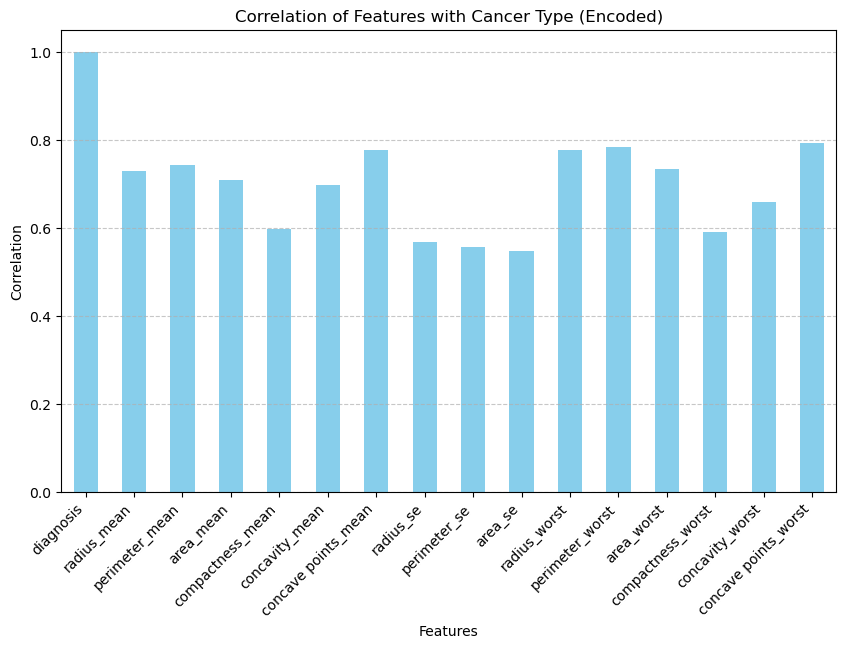

In [16]:
plt.figure(figsize=(10, 6))
corr_target_best.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Cancer Type (Encoded)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We observe that the features like radius, area, perimeter, concavity, and compactness have a high correlation with our Target Vector Diagnosis. Hence these features will help us in detecting cancer

## Splitting the data

In [17]:
X = df.drop('diagnosis', axis=1) 
y = df['diagnosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,random_state=42,stratify=y)

In [19]:
X_train.shape

(381, 30)

In [20]:
X_test.shape

(188, 30)

In [21]:
training_score = []
testing_score = []

## Logistic Regression

In [22]:
lr = LogisticRegression(random_state=42)
predictor = lr.fit(X_train,y_train)
y_pred = predictor.predict(X_test)
accuracy_lr = accuracy_score(y_pred,y_test)
print(accuracy_lr)

0.9308510638297872


C:\Users\hkaur37\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
X_train_pred = lr.predict(X_train)
X_test_pred = lr.predict(X_test)

training_score.append(r2_score(y_train, X_train_pred) * 100)
testing_score.append(r2_score(y_test, X_test_pred) * 100)

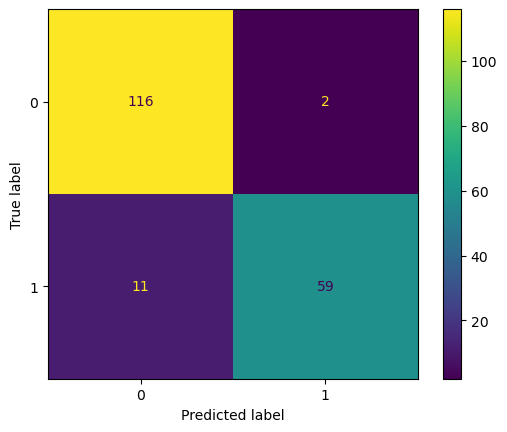

In [24]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       118
           1       0.97      0.84      0.90        70

    accuracy                           0.93       188
   macro avg       0.94      0.91      0.92       188
weighted avg       0.93      0.93      0.93       188



In [26]:
y_prob = lr.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_prob)
print(fpr)
print(tpr)

[0.         0.         0.         0.         0.00847458 0.00847458
 0.01694915 0.01694915 0.02542373 0.02542373 0.05084746 0.05084746
 0.05932203 0.05932203 0.29661017 0.29661017 1.        ]
[0.         0.04285714 0.07142857 0.77142857 0.77142857 0.84285714
 0.84285714 0.88571429 0.88571429 0.92857143 0.92857143 0.94285714
 0.94285714 0.98571429 0.98571429 1.         1.        ]


In [27]:
AUC = auc(fpr,tpr)
print('Area Under Curve: ',AUC)

Area Under Curve:  0.9900726392251816


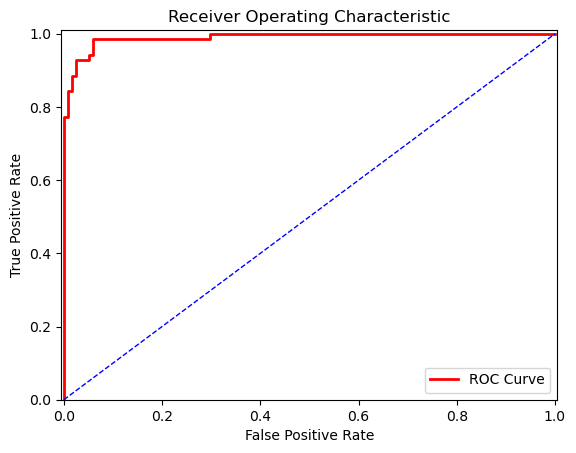

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')
plt.plot([0,1], [0,1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005,1.005])
plt.ylim([0.0,1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

## Random Forest Classifier

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_pred,y_test)
print(rf_accuracy)

0.9627659574468085


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       118
           1       1.00      0.90      0.95        70

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



In [31]:
X_train_pred = rf.predict(X_train)
X_test_pred = rf.predict(X_test)

training_score.append(r2_score(y_train, X_train_pred) * 100)
testing_score.append(r2_score(y_test, X_test_pred) * 100)

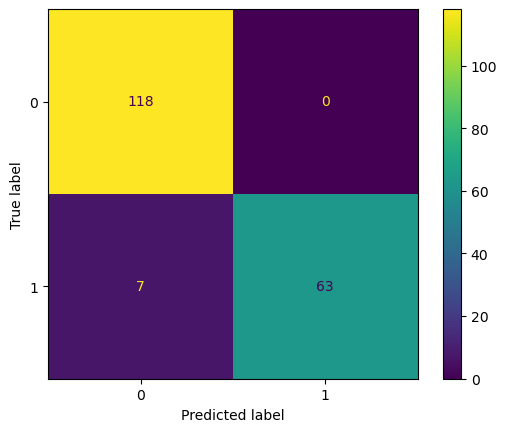

In [32]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test)

In [33]:
y_prob = rf.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_prob)
print(fpr)
print(tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00847458 0.00847458 0.01694915 0.01694915 0.03389831 0.03389831
 0.07627119 0.07627119 0.08474576 0.11016949 0.16101695 0.16949153
 0.21186441 0.24576271 0.3220339  0.3559322  0.44915254 0.63559322
 1.        ]
[0.         0.4        0.51428571 0.58571429 0.62857143 0.64285714
 0.67142857 0.7        0.72857143 0.87142857 0.9        0.91428571
 0.91428571 0.92857143 0.92857143 0.94285714 0.94285714 0.95714286
 0.95714286 0.97142857 0.97142857 0.97142857 1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [34]:
AUC = auc(fpr,tpr)
print('Area Under Curve: ',AUC)

Area Under Curve:  0.9941888619854722


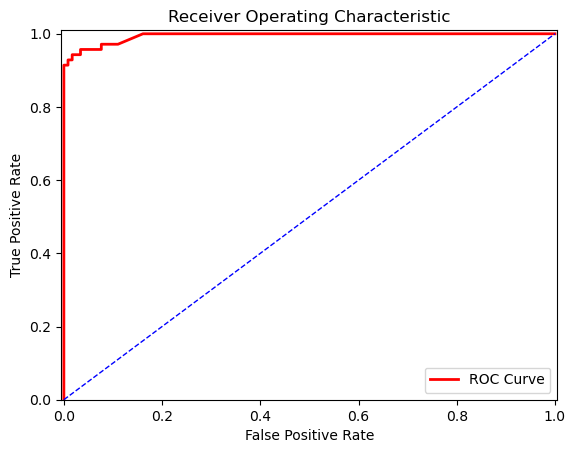

In [35]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve')
plt.plot([0,1], [0,1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005,1.005])
plt.ylim([0.0,1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()

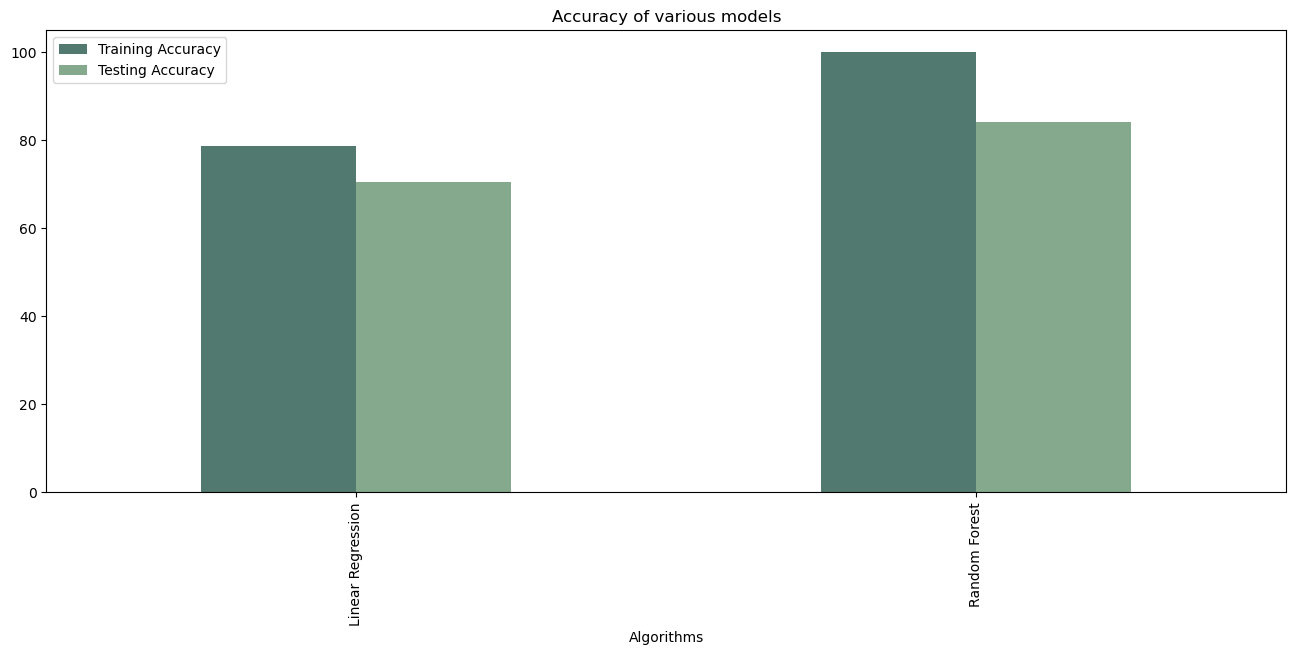

In [36]:
models = ['Linear Regression', 'Random Forest']
model_df = pd.DataFrame({'Algorithms': models,
                        'Training Accuracy': training_score,
                        'Testing Accuracy': testing_score,})

fig, ax = plt.subplots(figsize=(16, 6))
model_df.plot(x="Algorithms", y=["Training Accuracy", "Testing Accuracy"], kind="bar", ax=ax, color=['#52796F', '#84A98C'])
ax.legend(["Training Accuracy", "Testing Accuracy"], loc='upper left')
plt.title("Accuracy of various models")
plt.show()